<h1 style="font-family: Arial; font-size:4em;color:blue;">A Guide to Getting Data from the Canada Deployment Database:</h1>
    
    

<h2 style="font-family: Arial; font-size:3em;color:black;">1a. General Query Box (not for hotspots, skip 1a and run 1b if you want hotspots):</h2>
<p style="font-family: Arial; font-size:1em;color:black;">If you are looking to find data from a particular device based on time, please input the 3 query parameters by following the instructions below. Then, run the box below by clicking the box, then clicking run (button on the menu).Finally, skip part 1b, and move on to Part 2: Getting data from the database.</p>
<p style="font-family: Arial; font-size:1em;color:red;">REMINDER: The two devices in Canada ARE: '310043000a47373336373936' and '250046000a47373336373936'</p>

In [16]:
#1. Input which device you want to search:
#   Hint: The two choices for Canada are '310043000a47373336373936' and '250046000a47373336373936'
deviceID = '310043000a47373336373936'

#2. Input what is the earliest time you want to search for: 
#   Hint: format is (Year, Month, Day, Hour, Minute, Second)
minimum_time = (2019,7,30,8,0,30)

#3. Input what is the latest time you want to search for:
#   Hint: format is (Year, Month, Day, Hour, Minute, Second)
maximum_time = (2019,7,31,9,0,30)

#Done! Now click run (the button on top menu).

#Do not touch below.
import requests
import datetime
import pandas as pd 
mintime = str(int(datetime.datetime(*minimum_time).timestamp()))
maxtime = str(int(datetime.datetime(*maximum_time).timestamp()))
table = 'canada-data'
GSI = 'false'
PM = '100'
URL="https://znd63koi6g.execute-api.us-east-1.amazonaws.com/beta/data?deviceID="+deviceID+"&table="+table+"&min="+mintime+"&max="+maxtime+"&GSI="+GSI+"&PM="+PM
print (URL)

https://znd63koi6g.execute-api.us-east-1.amazonaws.com/beta/data?deviceID=310043000a47373336373936&table=canada-data&min=1564488030&max=1564578030&GSI=false&PM=100


<h2 style="font-family: Arial; font-size:3em;color:black;">1b. Hotspot Query Box (not for general searching, skip 1b if you've already run 1a):</h2>
<p style="font-family: Arial; font-size:1em;color:black;">If you are searching for data based on air quality (PM2.5 levels), please input the 4 query parameters by following the instructions below. Then, run the box below by first clicking the box, then click run (button on the menu). Finally, move on to Part 2: Getting data from the database.</p>
<p style="font-family: Arial; font-size:1em;color:red;">REMINDER: The two devices in Canada ARE: '310043000a47373336373936' and '250046000a47373336373936'</p>

In [13]:
#1. Input which device you want to search:
#   Hint: The two choices for Canada are '310043000a47373336373936' and '250046000a47373336373936'
deviceID = '310043000a47373336373936'

#2. Input what is the earliest time you want to search for: 
#   Hint: format is (Year, Month, Day, Hour, Minute, Second)
minimum_time = (2019,7,30,8,0,30)

#3. Input what is the latest time you want to search for:
#   Hint: format is (Year, Month, Day, Hour, Minute, Second)
maximum_time = (2019,7,31,9,0,30)

#4. Input the minimum PM2.5 measurement that you consider a hotspot:
PM = '100'

#Done! Now click run (the button on top menu).


#DO NOT TOUCH BELOW.
import requests
import datetime
import pandas as pd 
mintime = str(int(datetime.datetime(*minimum_time).timestamp()))
maxtime = str(int(datetime.datetime(*maximum_time).timestamp()))
GSI = 'deviceID-PM2.5-index'
table = 'canada-data'
URL="https://znd63koi6g.execute-api.us-east-1.amazonaws.com/beta/data?deviceID="+deviceID+"&table="+table+"&min="+mintime+"&max="+maxtime+"&GSI="+GSI+"&PM="+PM
print (URL)

https://znd63koi6g.execute-api.us-east-1.amazonaws.com/beta/data?deviceID=310043000a47373336373936&table=canada-data&min=1564488030&max=1564578030&GSI=deviceID-PM2.5-index&PM=100


<h2 style="font-family: Arial; font-size:3em;color:black;">2. Getting data from the database:</h2>
<p style="font-family: Arial; font-size:1em;color:black;">After you have run one of the two query boxes above, run the box below by clicking the box below and clicking run (button on the menu). If you get a success, you can move on.</p>

<p style="font-family: Arial; font-size:1em;color:red;">Warning: This could take some time. Wait for a message to appear.</p>

In [17]:
#If you have run either 1a or 1b, go ahead and press the run button for this box. If you get a success, you can move on.


#DO NOT TOUCH BELOW
#use request library to get from API that queries the dyanmodb
response = requests.get(URL)
status = str(response.status_code)[0]

#This checks the status code for a good status 200 or 300. If you get an error, something is wrong.
if status=="2" or status=="3":
    json = response.json()
    print('Success! You used the API to get data from the database! This is a brief overview of the data:' )
    #load in the json response body, create a new dataframe
    new_df = pd.DataFrame.from_records(json)
    #convert datetime to EST and add an 'on' column
    new_df['datetime'] = pd.to_datetime(new_df['datetime'], unit='s').dt.tz_localize('GMT').dt.tz_convert('US/Eastern').dt.tz_localize(None)
    new_df = new_df.set_index('datetime')
    new_df['On']=1
    print(new_df.head())
else:
    raise ValueError('Error: Check Query Parameters and try again. Either you input the parameters incorrectly or no data exists for that period. You need a Success before moving on to the next box.')

Success! You used the API to get data from the database! This is a brief overview of the data:
                     bin15  bin14  bin13  PM2.5  bin12  temperature  bin11  \
datetime                                                                     
2019-07-30 15:30:50    0.0    0.0    0.0  10.44    0.0         25.7    0.0   
2019-07-30 15:31:00    0.0    0.0    0.0  13.46    0.0         25.7    0.0   
2019-07-30 15:31:10    0.0    0.0    0.0   9.54    0.0         25.7    0.0   
2019-07-30 15:31:20    0.0    0.0    0.0   8.11    0.0         25.7    0.0   
2019-07-30 15:31:30    0.0    0.0    0.0  12.20    0.0         25.7    0.0   

                     bin10                  deviceID  humidity  ...  bin9  \
datetime                                                        ...         
2019-07-30 15:30:50    0.0  310043000a47373336373936      31.2  ...   0.0   
2019-07-30 15:31:00    0.0  310043000a47373336373936      31.2  ...   0.0   
2019-07-30 15:31:10    0.0  310043000a473733363739

<h2 style="font-family: Arial; font-size:3em;color:black;">3. Plots of PM1, PM2.5, and PM10:</h2>

<p style="font-family: Arial; font-size:1em;color:black;">If you got a success message from the previous box, go ahead and run the box below, which will plot PM2.5, PM1, and PM10 for the device you selected over the time you selected. You can use the tools to zoom into the plots and pan.</p>

<IPython.core.display.Javascript object>


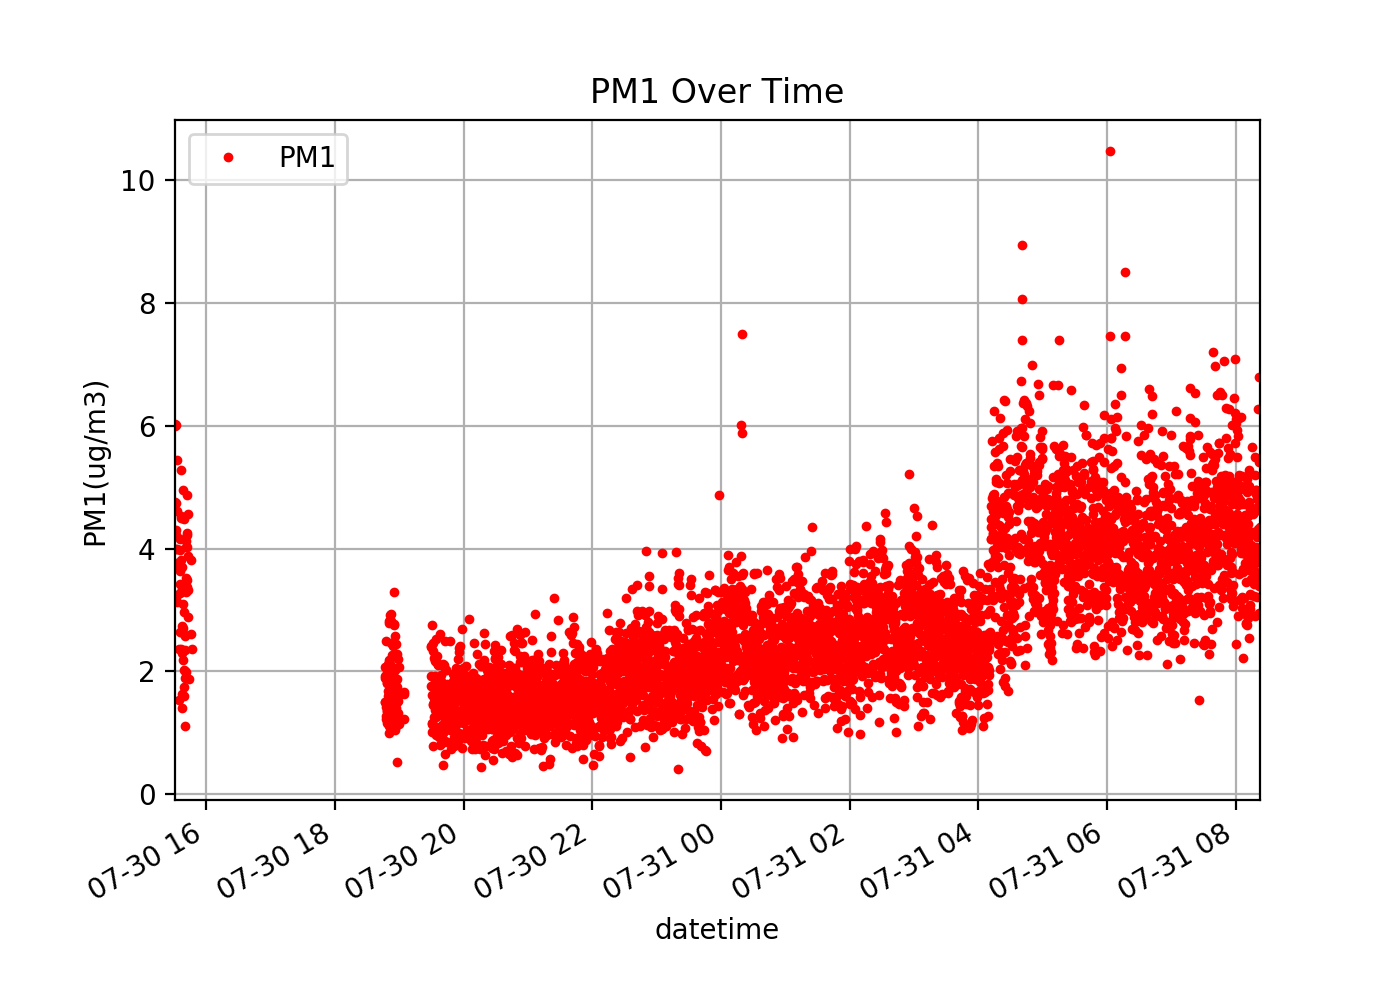

<IPython.core.display.Javascript object>


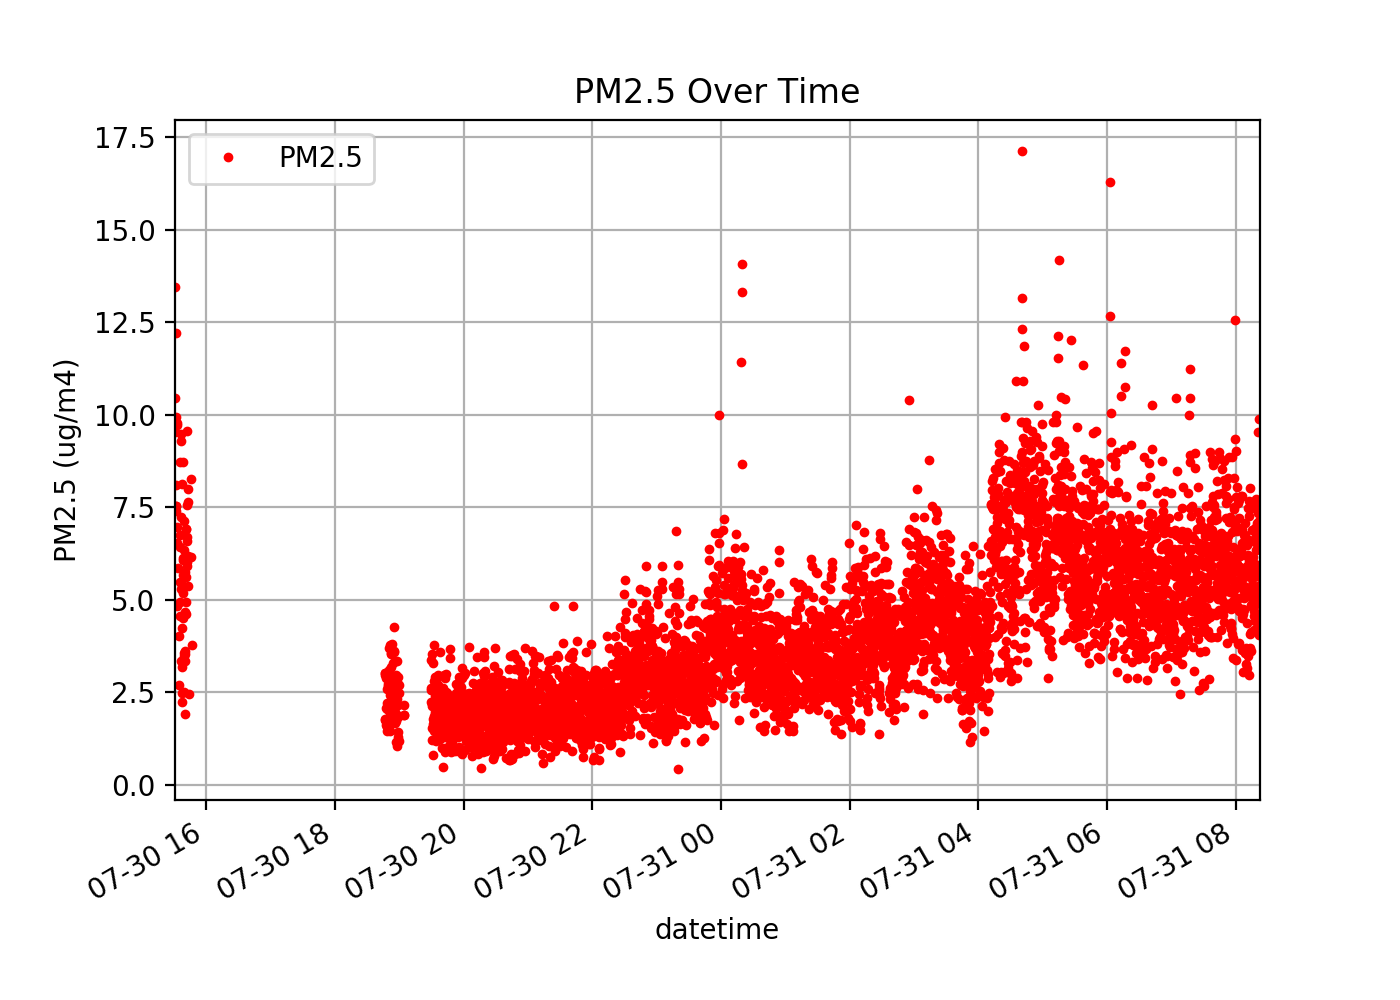

<IPython.core.display.Javascript object>


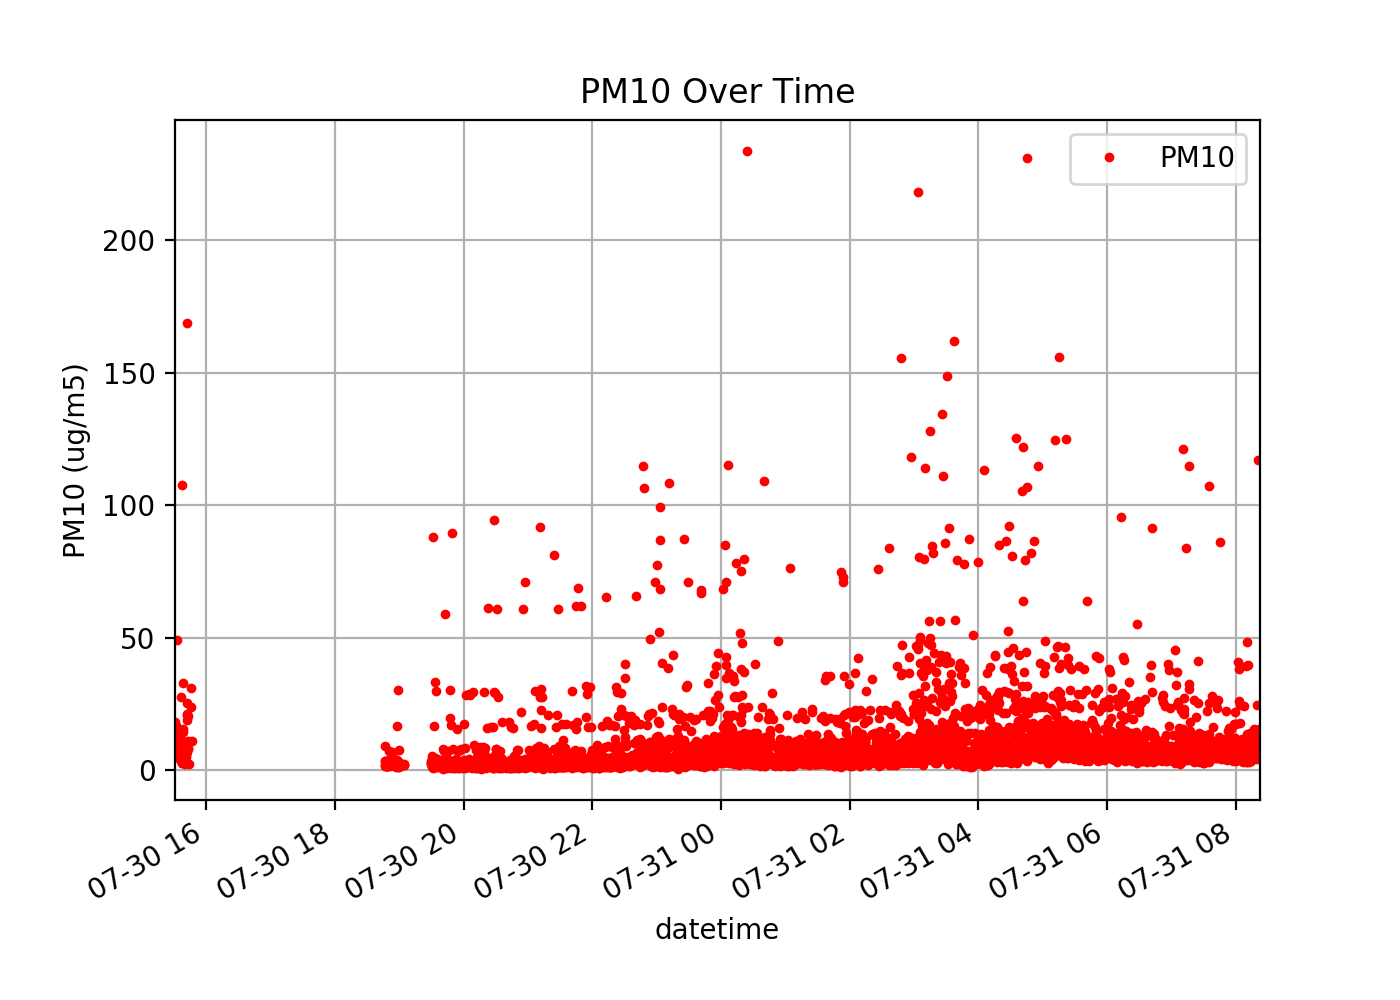

Text(0, 0.5, 'PM10 (ug/m5)')

In [18]:
#Click on this box, then click run. You can use the tools to zoom into the plots and pan.

%matplotlib notebook

#plot PM1
PM1=new_df.plot(y='PM1',title='PM1 Over Time', style='r.',markersize=5,figsize=(7, 5), grid=True)
PM1.set_ylabel('PM1(ug/m3)')

#plot PM2.5
PM2_5=new_df.plot(y='PM2.5',title='PM2.5 Over Time', style='r.',markersize=5,figsize=(7, 5), grid=True)
PM2_5.set_ylabel('PM2.5 (ug/m4)')

#plot PM10
PM10=new_df.plot(y='PM10',title='PM10 Over Time', style='r.',markersize=5,figsize=(7, 5), grid=True)
PM10.set_ylabel('PM10 (ug/m5)')

<h2 style="font-family: Arial; font-size:3em;color:black;">4. Map of the data you queried:</h2>

<p style="font-family: Arial; font-size:1em;color:black;">This will plot the data that you searched for on an interactive map. Click the run button on the box below. Use the zoom in and out buttons to explore.</p>

In [9]:
#Click On this Box and then Click Run to See a Map of the Points you Queried for.

#Do Not Touch Below.
#Plotting all UNIQUE points (lat, long) on the map
import folium

start_point=(49.743488, -114.87236)

#key="sk.eyJ1IjoiYW5uaWUxYmx1ZSIsImEiOiJjand0b29lMWMwMmpjNDNscnBldnJ2dGJ2In0.z9120aEgKyWaBANXqilRag"
my_map = folium.Map(location=start_point, zoom_start=12,tiles='Stamen Terrain')
#API_key=key,tiles='Mapbox Bright')

points=[]
for index, row in new_df.iterrows():
    point=(row['latitude'], row['longitude'])
    if point not in points:
        new_point=(row['latitude'], row['longitude'])
        points.append(new_point)

for each in points:
    folium.CircleMarker(location=each, popup='Point:'+ str(each), color='blue', fill=True, fill_color='blue',radius=10).add_to(my_map)
my_map.add_child(folium.LatLngPopup())
my_map

<h2 style="font-family: Arial; font-size:3em;color:black;">5. Plot when the device you selected has been ON for the time range you selected:</h2>

<p style="font-family: Arial; font-size:1em;color:black;">Click the run button on the box below to see the plot. You can use the tools to zoom into the plots and pan.</p>

<IPython.core.display.Javascript object>


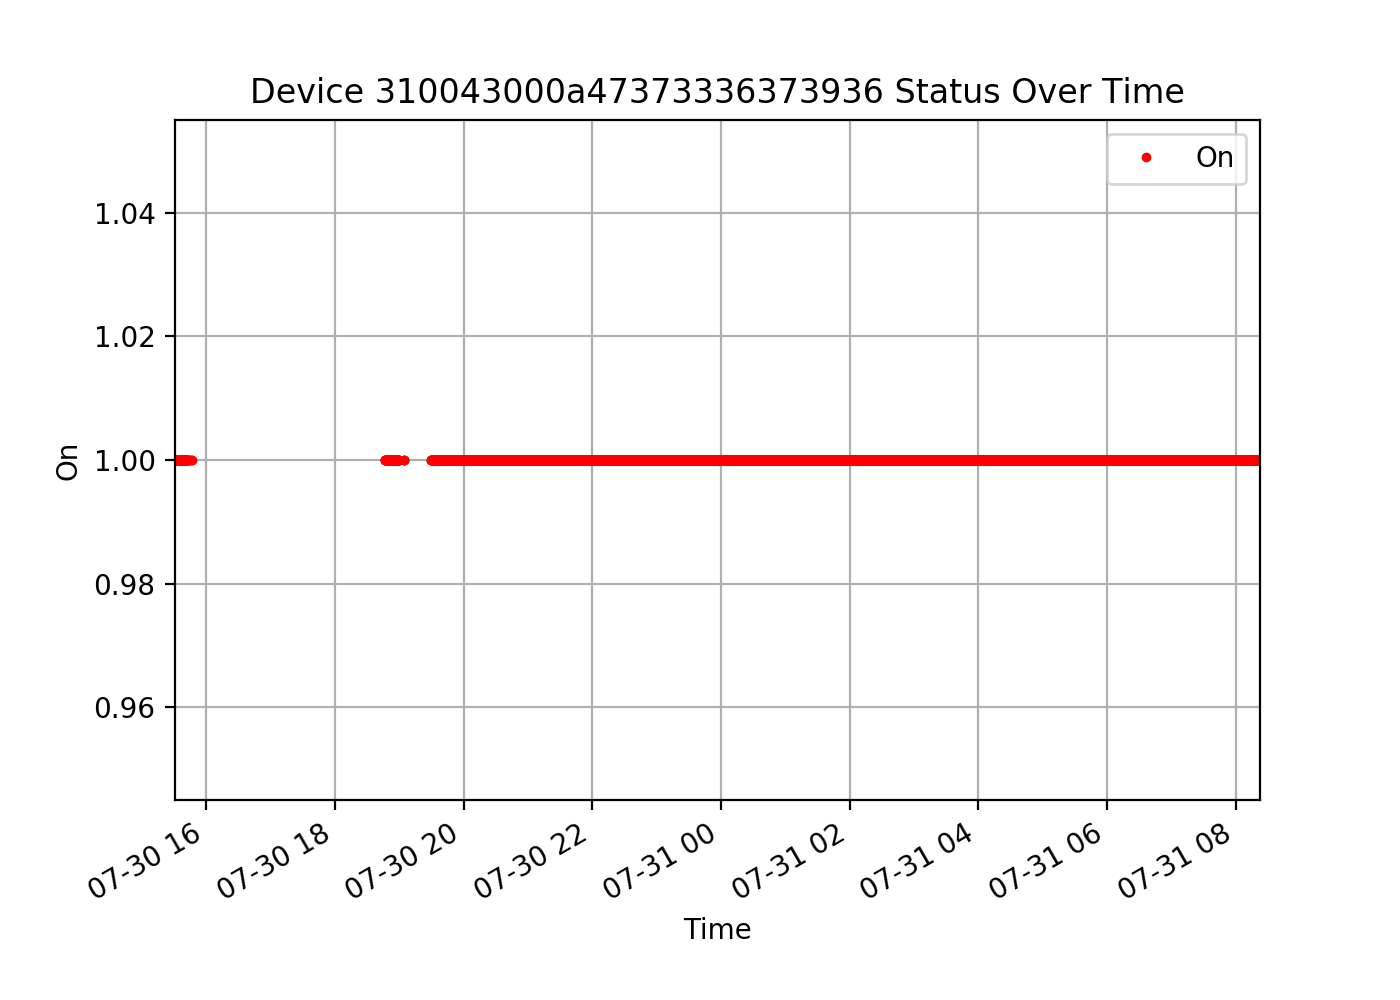

In [12]:
#Click on this box and then click run to see a plot of when your device has been on/transmitting data.
#You can use the tools to zoom into the plots and pan.

%matplotlib notebook
import matplotlib

if deviceID=='310043000a47373336373936':
    #create a new dataframe for canada device 1 
    device_1=new_df.loc[new_df['deviceID']=='310043000a47373336373936']

    #plot onoff for device 1 
    onoff=device_1.plot(y='On',title='Device '+deviceID+' Status Over Time', style='r.',markersize=5,figsize=(7, 5), grid=True)
    onoff.set_ylabel('On')
    onoff.set_xlabel('Time')
    matplotlib.pyplot.show()
else:
    #create a new dataframe for canada device 2
    device_2=new_df.loc[new_df['deviceID']=='250046000a47373336373936']

    #plot onoff for device 2
    onoff=device_2.plot(y='On',title='Device '+deviceID+' Status Over Time', style='r.',markersize=5,figsize=(7, 5), grid=True)
    onoff.set_ylabel('On')
    onoff.set_xlabel('Time')
    matplotlib.pyplot.show()